# Starters
## Import Packages

In [2]:
from urllib import request
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np

In [3]:
sns.set_style('darkgrid')

## Helpers functions

In [4]:
# Function to quickly describe data
def data_desc(my_imported_data):
    print(my_imported_data.dropna(how = 'all').shape) #pour voir si certaines lignes comportent des valeurs NaN partout (Non)
    print(my_imported_data.shape)
    return(my_imported_data.dtypes)

# Function to return in a dictionary ratio of nan values per variable sorted in descending order
def display_nan_Values(my_imported_data):
    nan_dict = {my_imported_data.columns[var]: my_imported_data.iloc[:,var].isna().mean()
                     for var in range(my_imported_data.shape[1])}
    sorted_dict_by_nanvalues = sorted(nan_dict.items(), key=lambda x:x[1], reverse=True)
    sorted_dict = dict(sorted_dict_by_nanvalues)
    return sorted_dict

# Function for replacing UPPERCASE with lowercase in variables names using title()
def columns_title_format(my_imported_data): 
    data_columns = list(my_imported_data.columns)
    data_columns = [col.title() for col in data_columns]
    print(data_columns)
    my_imported_data.columns = data_columns
    my_imported_data.head()
    return my_imported_data

# Function To project a variable onto a dataframe
def present_variable_in_tab(my_dataset, variable_col, variable_new_name):
    effectifs = my_dataset[variable_col].value_counts()
    modalites = effectifs.index # l'index des effectifs contient les modalités

    tab = pd.DataFrame(modalites, columns = [variable_new_name]) # création du tableau à partir des modalités
    tab["n"] = effectifs.values
    tab["f"] = tab["n"] / len(my_dataset) # len(data) renvoie la taille de l'échantillon
    tab = tab.sort_values(by=[variable_new_name]) #n would be of use if many values had a on the first column of nutrigrade
    #tab.index = [1, 2, 3 ,4 ,5]
    return(tab)


In [5]:
# Function to estimate percentage of null values for each variable in the dataset
def compute_nan_P(dataset):
    data_isna_P = (dataset.isna().sum()) * 100/len(dataset)
    cols = [x for x in range (dataset.shape[1])]
    count =0
    for ii in data_isna_P.index:
        count +=1
        if (data_isna_P[ii] > 55):
            #countna = +1
            cols.remove(count-1)
            print (ii)
        else:
            continue
    return (data_isna_P, cols)

In [6]:
# Function to compute linear regression
def iterate_regression(X, y):
    Lr = LinearRegression()

    # step1(): train_test_split
    x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8)        
    plt.scatter(x_train, y_train, label = 'Training data', color = 'red', alpha=.7)
    plt.scatter (x_test, y_test, label ='Testing data', color ='g', alpha=.7)
    plt.legend()
    plt.title('Test Train Split')
    plt.show()
    # step2(): fit
    Lr.fit(x_train.values.reshape(-1, 1), y_train.values)
    # step3(): predict
    prediction = Lr.predict(x_test.values.reshape(-1, 1))
    plt.plot(x_test, prediction, label ='Linear Regression', color ='b')
    plt.scatter(x_test, y_test, label ='Test data', color ='g', alpha=.7)
    plt.legend()
    plt.show()
    # step 4: Compute score 
    FirstReg_score = Lr.score(x_test.values.reshape(-1, 1), y_test.values)
    Lr.get_params(deep=True)

In [7]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)


In [8]:
# Function to display fcatorial planes
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

# Exploratory Analysis

## Import Data

In [9]:
explored_dataset = pd.read_csv('/Users/souha_kassab/OC_project3/static/csv/explored_dataset_multifmaily_322023.csv', 
                               index_col=[0])

In [10]:
explored_dataset.head()

,Numberofbuildings,Numberoffloors,Propertygfatotal,Propertygfaparking,Propertygfabuilding(S),Largestpropertyusetypegfa,Secondlargestpropertyusetypegfa,Energystarscore,Siteeui(Kbtu/Sf),Siteeuiwn(Kbtu/Sf),...,Siteenergyusewn(Kbtu),Steamuse(Kbtu),Electricity(Kwh),Electricity(Kbtu),Naturalgas(Therms),Naturalgas(Kbtu),Totalghgemissions,Ghgemissionsintensity,Non_residential,residential
0,1.0,12,88434,0,88434,88434.0,NaN,60.0,81.699997,84.300003,...,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,249.98,2.83,1,0
1,1.0,11,103566,15064,88502,83880.0,15064.0,61.0,94.800003,97.900002,...,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,295.86,2.86,1,0
2,1.0,41,956110,196718,759392,756493.0,NaN,43.0,96.000000,97.699997,...,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,2089.28,2.19,1,0
3,1.0,10,61320,0,61320,61320.0,NaN,56.0,110.800003,113.300003,...,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,286.43,4.67,1,0
4,1.0,18,175580,62000,113580,123445.0,68009.0,75.0,114.800003,118.699997,...,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,505.01,2.88,1,0


In [12]:
explored_dataset.shape

(3356, 23)

# PCA

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Data split

In [14]:
cols = ['Numberofbuildings', 'Numberoffloors', 'Propertygfatotal', 'Siteenergyuse(Kbtu)', 'Siteenergyusewn(Kbtu)', 'Steamuse(Kbtu)',
       'Electricity(Kwh)', 'Electricity(Kbtu)', 'Naturalgas(Therms)',
       'Naturalgas(Kbtu)', 'Non_residential']
#cols = ['Siteenergyuse(Kbtu)', 'Siteenergyusewn(Kbtu)', 'Steamuse(Kbtu)',
 #      'Electricity(Kwh)', 'Electricity(Kbtu)', 'Naturalgas(Therms)',
  #     'Naturalgas(Kbtu)', 'Non_residential']
#linear_model_dataset = explored_dataset[cols]
#explored_dataset

In [15]:
## Data split
X = explored_dataset.loc[:, cols].values
#first_7dataset.iloc[:, -3]
X[:5]

array([[1.00000000e+00, 1.20000000e+01, 8.84340000e+04, 7.22636250e+06,
        7.45691000e+06, 2.00388200e+06, 1.15651425e+06, 3.94602700e+06,
        1.27645293e+04, 1.27645300e+06, 1.00000000e+00],
       [1.00000000e+00, 1.10000000e+01, 1.03566000e+05, 8.38793300e+06,
        8.66447900e+06, 0.00000000e+00, 9.50425188e+05, 3.24285100e+06,
        5.14508164e+04, 5.14508200e+06, 1.00000000e+00],
       [1.00000000e+00, 4.10000000e+01, 9.56110000e+05, 7.25870240e+07,
        7.39371120e+07, 2.15665540e+07, 1.45154350e+07, 4.95266640e+07,
        1.49380000e+04, 1.49380000e+06, 1.00000000e+00],
       [1.00000000e+00, 1.00000000e+01, 6.13200000e+04, 6.79458400e+06,
        6.94680050e+06, 2.21444625e+06, 8.11525312e+05, 2.76892400e+06,
        1.81121309e+04, 1.81121300e+06, 1.00000000e+00],
       [1.00000000e+00, 1.80000000e+01, 1.75580000e+05, 1.41726060e+07,
        1.46565030e+07, 0.00000000e+00, 1.57344862e+06, 5.36860700e+06,
        8.80399844e+04, 8.80399800e+06, 1.00000000e+

In [16]:
X.shape

(3356, 11)

In [17]:
#columns in features variable
features = cols[:]
features

['Numberofbuildings',
 'Numberoffloors',
 'Propertygfatotal',
 'Siteenergyuse(Kbtu)',
 'Siteenergyusewn(Kbtu)',
 'Steamuse(Kbtu)',
 'Electricity(Kwh)',
 'Electricity(Kbtu)',
 'Naturalgas(Therms)',
 'Naturalgas(Kbtu)',
 'Non_residential']

## Scaling

In [18]:
# Instantiate scaler
scaler = StandardScaler()

In [19]:
X_scaled = scaler.fit_transform(X)
idx = ["mean", "std"]
#reduction et centrage
pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6,7,8,9,10
mean,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [18]:
np.where(np.isnan(X_scaled))

(array([], dtype=int64), array([], dtype=int64))

## ACP instanciation

In [20]:
#99% of variance
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.99)
pca.fit(X_scaled)
reduced = pca.transform(X_scaled)

## Variance

In [21]:
pca.explained_variance_ratio_
scree = (pca.explained_variance_ratio_*100).round(2)
print(scree)
scree_cum = scree.cumsum().round()
print(scree_cum)

x_list = range(1, len(scree)+1)
list(x_list)

[50.12 19.59 10.38  8.5   7.16  2.35  1.37]
[50. 70. 80. 89. 96. 98. 99.]


[1, 2, 3, 4, 5, 6, 7]

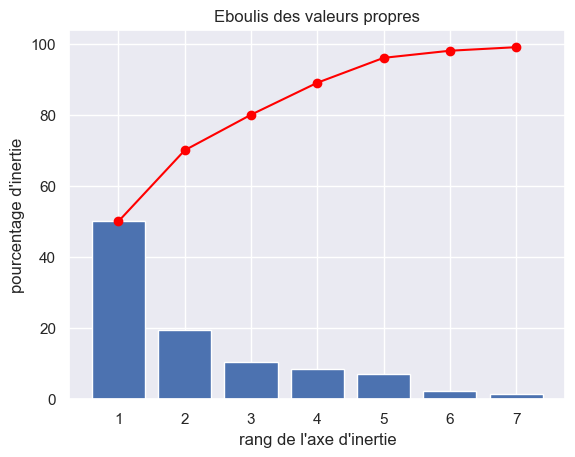

In [22]:
##plot
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

## Components

In [23]:
pcs = pca.components_
pcs

array([[ 0.28572456,  0.12435415,  0.35653782,  0.42177172,  0.31939237,
         0.25375507,  0.40335051,  0.40335051,  0.22466285,  0.22466285,
         0.07178949],
       [-0.33265941, -0.01335905, -0.22751719, -0.01424808,  0.3470533 ,
        -0.19444591, -0.16418129, -0.16418129,  0.55740506,  0.55740506,
         0.06020936],
       [-0.21272024,  0.78193488,  0.1362551 , -0.05646587,  0.09054473,
        -0.06825228, -0.0175108 , -0.01751081, -0.04246684, -0.04246684,
        -0.5518127 ],
       [ 0.33937795, -0.41047171, -0.05820606,  0.07270225, -0.18307187,
        -0.10722608,  0.01196248,  0.01196248,  0.16922709,  0.16922709,
        -0.77787368],
       [-0.2683289 , -0.1745228 , -0.26459764,  0.02921782,  0.32249572,
         0.79566157, -0.07402037, -0.07402037, -0.10642837, -0.10642837,
        -0.23660715],
       [-0.4881569 , -0.28991772, -0.10209309,  0.08658769,  0.30553899,
        -0.42312642,  0.36609442,  0.36609442, -0.2222197 , -0.2222197 ,
        -0.143

In [24]:
##Pandas version
pcs = pd.DataFrame(pcs)
#pcs
##Features labels on cols
pcs.columns = features[:]
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,Numberofbuildings,Numberoffloors,Propertygfatotal,Siteenergyuse(Kbtu),Siteenergyusewn(Kbtu),Steamuse(Kbtu),Electricity(Kwh),Electricity(Kbtu),Naturalgas(Therms),Naturalgas(Kbtu),Non_residential
F1,0.29,0.12,0.36,0.42,0.32,0.25,0.40,0.40,0.22,0.22,0.07
F2,-0.33,-0.01,-0.23,-0.01,0.35,-0.19,-0.16,-0.16,0.56,0.56,0.06
F3,-0.21,0.78,0.14,-0.06,0.09,-0.07,-0.02,-0.02,-0.04,-0.04,-0.55
F4,0.34,-0.41,-0.06,0.07,-0.18,-0.11,0.01,0.01,0.17,0.17,-0.78
F5,-0.27,-0.17,-0.26,0.03,0.32,0.80,-0.07,-0.07,-0.11,-0.11,-0.24
F6,-0.49,-0.29,-0.10,0.09,0.31,-0.42,0.37,0.37,-0.22,-0.22,-0.14
F7,0.39,0.29,-0.83,0.08,0.08,-0.08,0.15,0.15,-0.05,-0.05,0.07


## Correlation graph

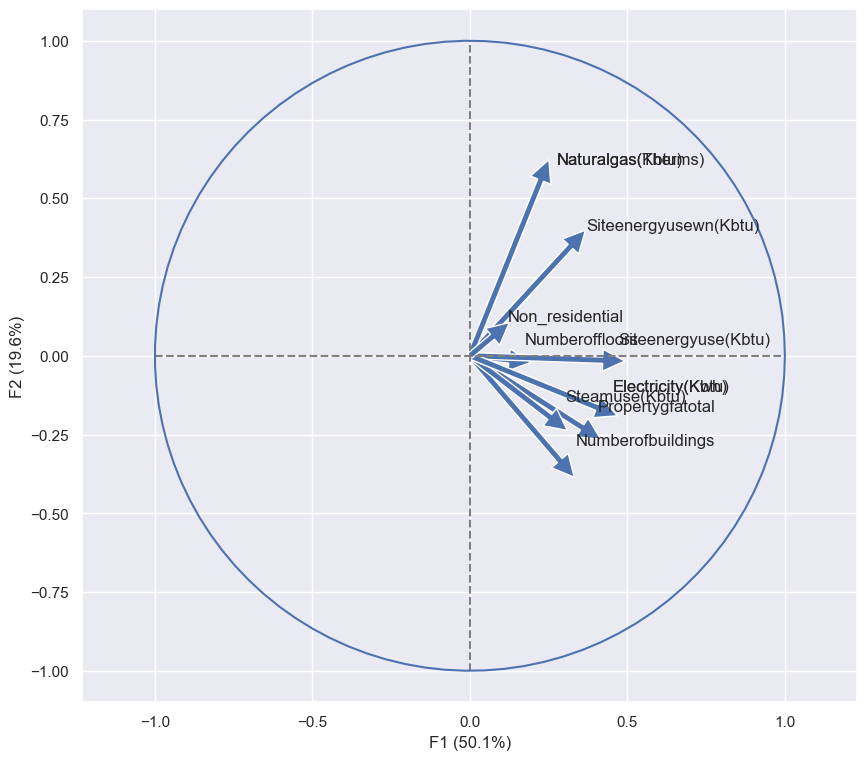

In [25]:
##Define graph axis
x_y = (0,1)
correlation_graph(pca, x_y, features)

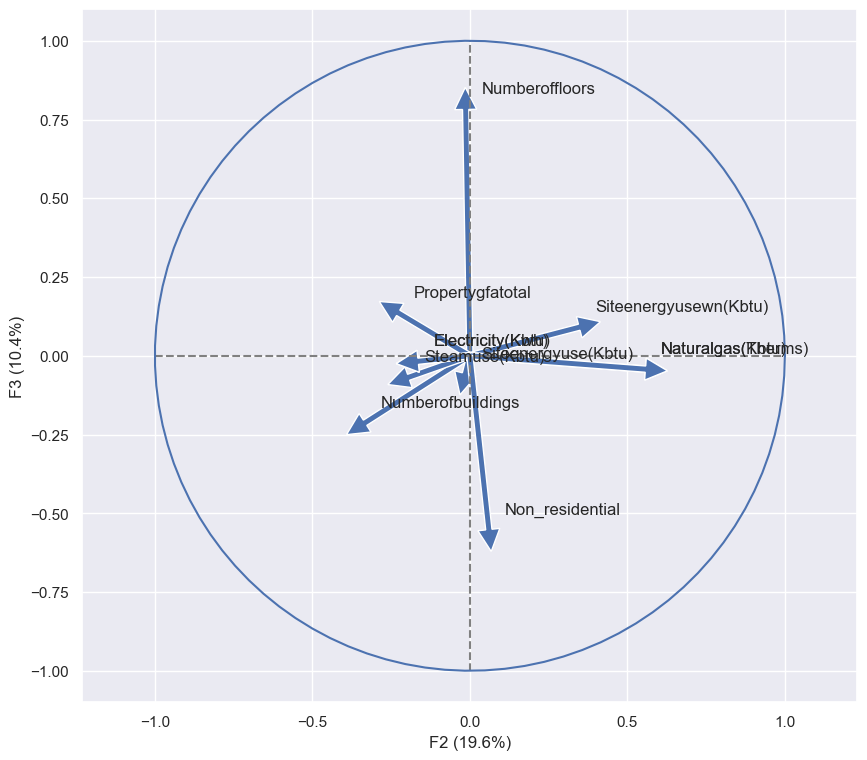

In [26]:
##Exploring F2 and F3
correlation_graph(pca, (1,2), features)

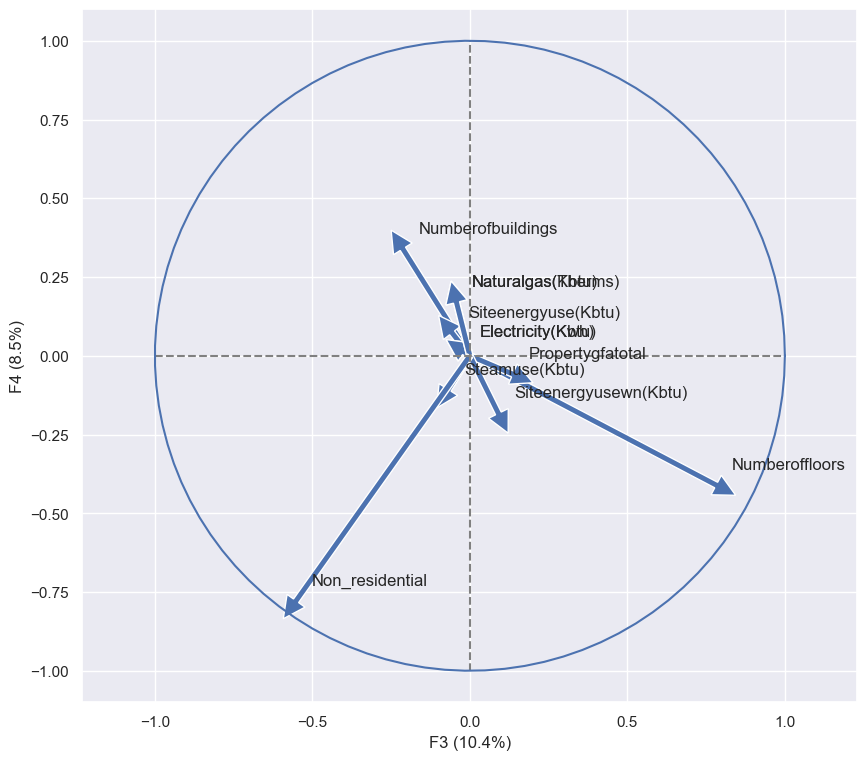

In [27]:
##Exploring F2 and F3
correlation_graph(pca, (2,3), features)

Consommation et emission strongly correlated entre elles
Elec et gaz liquide anti-correlated
Vapeur (energies fossiles et emisison aussi)

## Projection

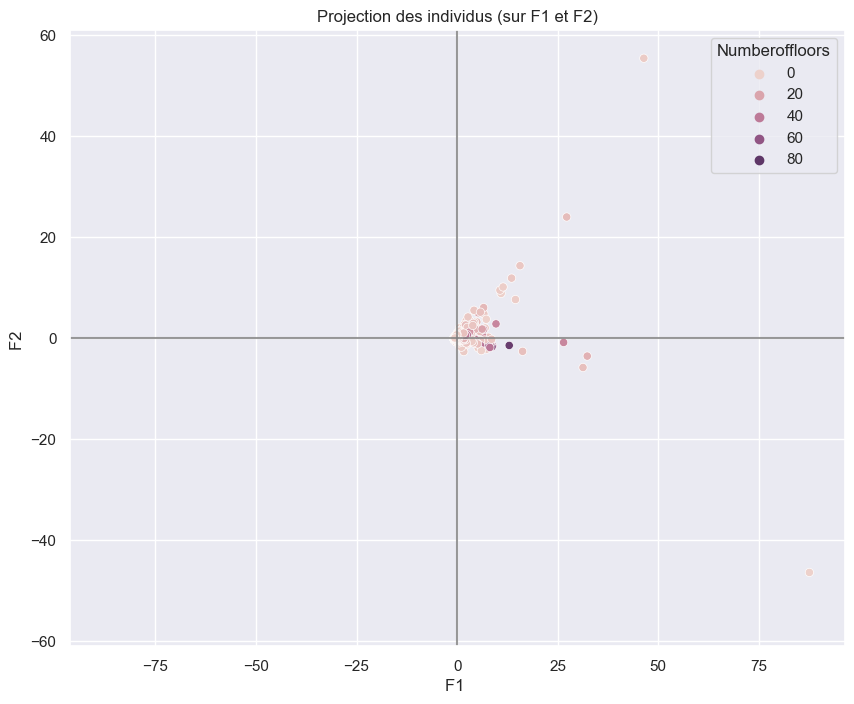

In [24]:
X_proj = pca.transform(X_scaled)
X_proj[:5]
x_y = [0,1]
display_factorial_planes(X_proj, x_y, clusters=explored_dataset['Numberoffloors'])

In [28]:
names = explored_dataset['Numberoffloors'].unique()
names

array([12, 11, 41, 10, 18,  2,  8, 15,  6, 25,  9, 33, 28,  5, 19,  7,  3,
        4, 24, 20, 34,  1,  0, 16, 23, 17, 36, 22, 47, 29, 14, 49, 37, 42,
       63, 13, 21, 55, 46, 30, 56, 26, 76, 27, 31, 99, 38, 39, 32, 40])

In [ ]:
x_y = 1,2
display_factorial_planes(X_proj, x_y, clusters = explored_dataset['Numberoffloors'],marker="o")

Notre prédiction se basera sur les données structurelles des bâtiments (taille et usage des bâtiments, date de construction, situation géographique, ...)
Variables concernees: 'OSEBuildingID', 'Address',  'Neighborhood',  'BuildingType', 'YearBuilt', 'LargestPropertyUseType' ; 
NaturalGas(kBtu): 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity'
Miscellaneous: 'ComplianceStatus', 'DataYear': Whether a property has met energy benchmarking requirements for the current reporting year.

# Regression example using sklearn & statsmodels

In [30]:
import scipy.stats as st
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [31]:
#reg_cols = ['Siteenergyuse(Kbtu)', 'Siteenergyusewn(Kbtu)', 'Steamuse(Kbtu)', 
 #           'Electricity(Kbtu)', 'Naturalgas(Kbtu)', 'Totalghgemissions']
#reg_cols = ['Electricity(Kbtu)','Naturalgas(Kbtu)', 'Non_residential', 'Steamuse(Kbtu)','Totalghgemissions']
reg_cols = ['Naturalgas(Kbtu)','Numberoffloors', 'Non_residential', 
            'Numberofbuildings', 'Totalghgemissions']

In [32]:
H = explored_dataset[reg_cols]
H.head()

,Naturalgas(Kbtu),Numberoffloors,Non_residential,Numberofbuildings,Totalghgemissions
0,1276453.0,12,1,1.0,249.98
1,5145082.0,11,1,1.0,295.86
2,1493800.0,41,1,1.0,2089.28
3,1811213.0,10,1,1.0,286.43
4,8803998.0,18,1,1.0,505.01


In [33]:
H[H['Totalghgemissions']<=0]

,Naturalgas(Kbtu),Numberoffloors,Non_residential,Numberofbuildings,Totalghgemissions


## Separate input features and target feature

In [34]:
#H = linear_model_dataset
b = H.iloc[:, -1] # Total emissions
b = np.log(abs(b))
A = H.iloc[:, :-1] #all other variables

## Rescale the data

In [35]:
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(A)

# Convert X back to a Pandas DataFrame, for convenience
A = pd.DataFrame(rescaledX, index=A.index, columns=A.columns)

## Model Fit

### Multiple Linear Regression of Totalghgemissions (raw value)

In [37]:
# Permute
p = np.random.permutation(len(H))
A = A.iloc[p, :]
b = b.iloc[p]
# Separate data
n = int(len(H)*4/5)
btrain = b.iloc[:n]
Atrain = A.iloc[:n]
btest = b.iloc[n:]
Atest = A.iloc[n:]

In [38]:
# import needed packages
import statsmodels.api as sm
from statsmodels.formula.api import ols
## --------------------------------------------- ##

In [39]:
#fit multiple linear regression model
Atrain=sm.add_constant(Atrain)        #to add constant value in the model
OLS_model= sm.OLS(btrain, Atrain).fit() 
#OLS_model = sm.OLS(btrain, Atrain).fit()
#view model summary
print(OLS_model.summary())
## --------------------------------------------- ##

                            OLS Regression Results                            
Dep. Variable:      Totalghgemissions   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     342.1
Date:                Sun, 12 Feb 2023   Prob (F-statistic):          4.02e-238
Time:                        19:55:17   Log-Likelihood:                -4350.5
No. Observations:                2684   AIC:                             8711.
Df Residuals:                    2679   BIC:                             8741.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.4904      0.04

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

train_predictions = OLS_model.predict(Atrain)
print("    MAE", mean_absolute_error(btrain, train_predictions))
print("    RMSE", np.sqrt(mean_squared_error(btrain, train_predictions)))
print("    R2", r2_score(btrain, train_predictions))
## --------------------------------------------- ##

    MAE 0.97342353183295
    RMSE 1.223815892591982
    R2 0.33810412649553934


In [45]:
# Evaluation of the models against test data using MAE, RMSE and R2
Atest=sm.add_constant(Atest)        #to add constant value in the model
test_predictions = OLS_model.predict(Atest)
print("    MAE", mean_absolute_error(btest, test_predictions))
print("    RMSE", np.sqrt(mean_squared_error(btest, test_predictions)))
print("    R2", r2_score(btest, test_predictions))

    MAE 0.9825112919249512
    RMSE 1.6773055481628696
    R2 -0.2180834900227313


_________________ Model overfit!____________________________

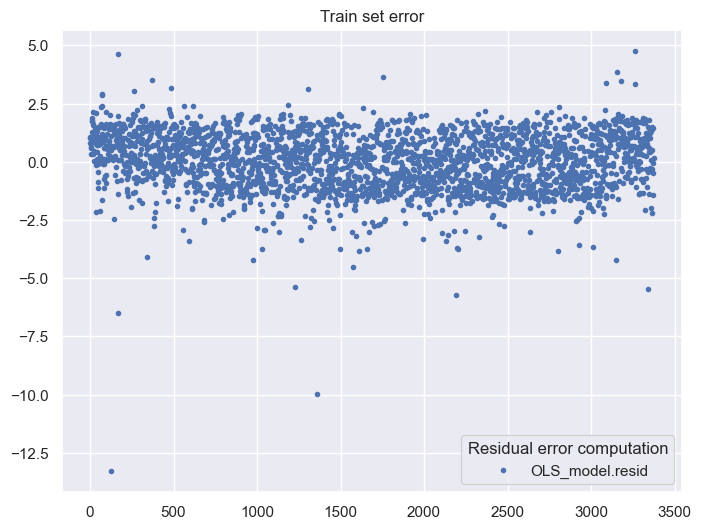

In [41]:
residual_values = OLS_model.resid 
sorted_residual_values = residual_values.sort_index()
#create residual vs. predictor plot for 'rebounds'
fig = plt.figure(figsize=(8,6))
#fig = sm.graphics.plot_regress_exog(OLS_model, Atrain, fig=fig)
plt.plot(sorted_residual_values, 'b.', label = 'OLS_model.resid')
#plt.plot(train_predictions-btrain, 'r.', label = 'manual_computational')

plt.legend(title ='Residual error computation')
plt.title('Train set error')
#plt.xlim(2000, 3500)
plt.show()
## --------------------------------------------- ##
#sorted_residual_values

<AxesSubplot: >

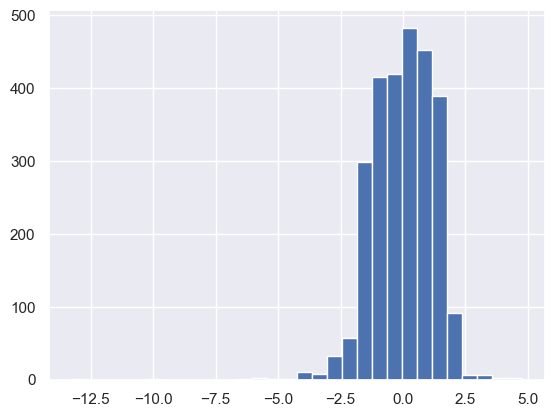

In [42]:
sorted_residual_values.hist(bins = 30)

In [43]:
Atrain.loc[sorted_residual_values<-2.5]

,const,Naturalgas(Kbtu),Numberoffloors,Non_residential,Numberofbuildings
2332,1.0,0.000000e+00,0.010101,1.0,0.009009
1458,1.0,0.000000e+00,0.010101,1.0,0.009009
2476,1.0,0.000000e+00,0.040404,0.0,0.009009
124,1.0,4.638706e-01,0.101010,1.0,0.054054
1658,1.0,0.000000e+00,0.020202,1.0,0.018018
2129,1.0,0.000000e+00,0.020202,1.0,0.009009
3009,1.0,2.305066e-05,0.020202,1.0,0.009009
1568,1.0,0.000000e+00,0.010101,1.0,0.009009
2205,1.0,0.000000e+00,0.010101,1.0,0.009009
2801,1.0,0.000000e+00,0.020202,1.0,0.009009


In [44]:
H.iloc[Atrain.loc[sorted_residual_values<-2.5].index]

,Naturalgas(Kbtu),Numberoffloors,Non_residential,Numberofbuildings,Totalghgemissions
2347,0.000000e+00,5,0,1.0,7.10
1469,2.294563e+06,1,1,1.0,135.81
2493,1.033040e+06,3,0,1.0,56.96
125,1.331883e+06,3,1,1.0,83.70
1670,3.475801e+06,1,1,5.0,184.60
2143,1.974870e+05,2,1,1.0,12.17
3027,1.981018e+06,7,0,1.0,118.45
1580,1.561976e+06,4,0,1.0,102.30
2219,0.000000e+00,6,0,1.0,6.64
2819,1.157150e+05,4,0,1.0,8.93


In [ ]:
first_df = pd.read_csv('')

In [ ]:
# plot data points from 'Natural gas' feature for which residuals are higher than zero - points over the HP are white, points below are black 
train_resid = train_predictions-btrain 
plt.scatter(Atrain.loc[train_resid >= 0, 'Naturalgas(Kbtu)'], btrain.loc[train_resid >= 0], color='black', alpha=1.0, facecolor='white') 
plt.scatter(Atrain.loc[train_resid < 0, 'Naturalgas(Kbtu)'], btrain.loc[train_resid < 0], color='black', alpha=1.0)

In [ ]:
# plot data points from 'Natural gas' feature for which residuals are higher than zero - points over the HP are white, points below are black 
test_resid = btest - OLS_model.predict(Atest) 
plt.scatter(Atest.loc[resid >= 0, 'Naturalgas(Kbtu)'], btest.loc[resid >= 0], color='black', alpha=1.0, facecolor='white') 
plt.scatter(Atest.loc[resid < 0, 'Naturalgas(Kbtu)'], btest.loc[resid < 0], color='black', alpha=1.0)

In [ ]:
resid

In [ ]:
#create residual vs. predictor plot for 'Numberoffloors'
fig = plt.figure(figsize=(12,12))
fig = sm.graphics.plot_regress_exog(OLS_model, 'Numberoffloors', fig=fig)
fig.tight_layout(pad=1.0)

In [ ]:
#fig = plt.figure(figsize=(12,12))
sm.graphics.plot_ccpr_grid(OLS_model)
#fig.tight_layout(pad=1.0)

### Multiple Linear Regression of Totalghgemissions (log normal)

In [46]:
del Atrain, btrain, Atest, btest, OLS_model

In [47]:
# Permute
p = np.random.permutation(len(H))
A = A.iloc[p, :]
b = b.iloc[p]
b = np.log(abs(b))
# Separate data
n = int(len(H)*4/5)
btrain = b.iloc[:n]
Atrain = A.iloc[:n]
btest = b.iloc[n:]
Atest = A.iloc[n:]

In [48]:
# import needed packages
import statsmodels.api as sm
from statsmodels.formula.api import ols
## --------------------------------------------- ##

In [49]:
#fit multiple linear regression model
Atrain=sm.add_constant(Atrain)        #to add constant value in the model
OLS_model= sm.OLS(btrain, Atrain).fit() 
#OLS_model = sm.OLS(btrain, Atrain).fit()
#view model summary
print(OLS_model.summary())
## --------------------------------------------- ##

                            OLS Regression Results                            
Dep. Variable:      Totalghgemissions   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     151.3
Date:                Sun, 12 Feb 2023   Prob (F-statistic):          8.33e-117
Time:                        19:58:09   Log-Likelihood:                -1718.9
No. Observations:                2684   AIC:                             3448.
Df Residuals:                    2679   BIC:                             3477.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.8651      0.01

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

train_predictions = OLS_model.predict(Atrain)
print("    MAE", mean_absolute_error(btrain, train_predictions))
print("    RMSE", np.sqrt(mean_squared_error(btrain, train_predictions)))
print("    R2", r2_score(btrain, train_predictions))
## --------------------------------------------- ##

    MAE 0.343507571887256
    RMSE 0.4590901721219546
    R2 0.18425551530678774


In [51]:
# Evaluation of the models against test data using MAE, RMSE and R2
Atest=sm.add_constant(Atest)        #to add constant value in the model
test_predictions = OLS_model.predict(Atest)
print("    MAE", mean_absolute_error(btest, test_predictions))
print("    RMSE", np.sqrt(mean_squared_error(btest, test_predictions)))
print("    R2", r2_score(btest, test_predictions))

    MAE 0.37411708791116816
    RMSE 0.5298942617610197
    R2 0.15883975641035697


In [ ]:
# plot data points - points over the HP are white, points below are black 
resid = btest - OLS_model.predict(Atest) 
#ax.scatter(X[resid >= 0].TV, X[resid >= 0].Radio, y[resid >= 0], color='black', alpha=1.0, facecolor='white') 
#ax.scatter(X[resid < 0].TV, X[resid < 0].Radio, y[resid < 0], color='black', alpha=1.0)

In [ ]:
#
OLS_model

In [ ]:
residual_values = OLS_model.resid 
sorted_residual_values = residual_values.sort_index()
#create residual vs. predictor plot for 'rebounds'
fig = plt.figure(figsize=(8,6))
#fig = sm.graphics.plot_regress_exog(OLS_model, Atrain, fig=fig)
plt.plot(test_predictions-btest, '.')
plt.show()
## --------------------------------------------- ##
#sorted_residual_values

In [ ]:
#create residual vs. predictor plot for 'assists'
fig = plt.figure(figsize=(12,8))

fig = sm.graphics.plot_regress_exog(OLS_model, 'Non_residential', fig=fig)
fig.tight_layout(pad=1.0)

# Linear Regression
## LR with log-normal on Totalghgemissions, all the features

Linear regression with manual SVD, all datas

### Choice of features

In [ ]:
explored_dataset.head()

In [41]:
reg_cols = ['Siteenergyuse(Kbtu)', 'Siteenergyusewn(Kbtu)', 'Steamuse(Kbtu)', 
            'Electricity(Kbtu)', 'Naturalgas(Kbtu)', 'residential', 'Totalghgemissions']

In [42]:
linear_model_dataset = explored_dataset[reg_cols]

### Data separation

In [ ]:
H = linear_model_dataset[linear_model_dataset['Totalghgemissions']>0]
b = H.iloc[:, -1] # Total emissions
b = np.log(abs(b))
A = H.iloc[:, :-1] #all other variables
A = np.pad(A, [(0,0), (0,1)], mode='constant', constant_values =1)
# Permute
p = np.random.permutation(len(H))
A = A[p, :]
b = b.iloc[p]
# Separate data
n = int(len(H)*4/5)
btrain = b.iloc[:n]
Atrain = A[:n]
btest = b.iloc[n:]
Atest = A[n:]

In [ ]:
train_sort_ind = np.argsort(btrain)
test_sort_ind = np.argsort(btest)

### Data normalization..?

In [ ]:
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
std_scale = preprocessing.StandardScaler().fit(Atrain)
A_train_std = std_scale.transform(Atrain)
A_test_std = std_scale.transform(Atest)

In [ ]:
A_train_std.mean(axis=0)

### SVD computation

In [ ]:
[U, S, VT] = np.linalg.svd(Atrain, full_matrices=False)
xtilde1 = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ btrain
#xtilde2 = np.linalg.pinv(a) * b

In [ ]:
print('Eigen values = ', S)

In [ ]:
# -----------------------------------------------------
# Train
fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.plot(np.arange(1, n+1), btrain.iloc[train_sort_ind], 'x', color ='r', markersize = 10, label ='y_emissions' )
plt.plot(np.arange(1, n+1), Atrain[train_sort_ind]@xtilde1, '-', color = 'b', linewidth = 2 , label ='y_head_prediction')
plt.xlabel('index')
plt.ylabel('b_train')
plt.title('l')
plt.legend(title = 'train set')
plt.show()
# -----------------------------------------------------
# Test
ax2 = fig.add_subplot(122)
plt.plot(np.arange(1, len(btest)+1), btest.iloc[test_sort_ind], 'x', color ='r', markersize = 10, label ='Noisy test data' )
plt.plot(np.arange(1, len(btest)+1), Atest[test_sort_ind]@xtilde1, '--', color = 'b', linewidth = 2 , label ='Regression line')
plt.xlabel('index')
plt.ylabel('b_test')
plt.title('')
plt.legend(title='test set')
plt.show()
# -----------------------------------------------------

### Error measurements

In [ ]:
MAE_train = sum(abs(btrain.iloc[train_sort_ind]-Atrain[train_sort_ind]@xtilde1)) /  len(btrain)
MAE_test = sum(abs(btest.iloc[test_sort_ind]-Atest[test_sort_ind]@xtilde1)) / len(btest)

print( 'Mean absolute error on the test set =', MAE_test,
      '\nMean absolute error on the train set =', MAE_train,
      '\nThe absolute error between test and train model is:', abs(MAE_test - MAE_train))

We can see that permuting the dataset prior to constructing the model reduces the MAE difference between train and test set

In [ ]:
RMSE_train = np.sqrt(sum(np.power(btrain.iloc[train_sort_ind]-Atrain[train_sort_ind]@xtilde1, 2))/len(btrain))

In [ ]:
RMSLE_train = np.sqrt(sum(np.power((np.log(1+btrain.iloc[train_sort_ind] / 1+Atrain[train_sort_ind]@xtilde1)), 2)/2)/len(btrain))
print('Root mean square error =', RMSE_train,
     '\n', 'Root mean square logarithmic error =',RMSLE_train )

In [ ]:
RMSE_test = np.sqrt(sum(np.power(btest.iloc[test_sort_ind]-Atest[test_sort_ind]@xtilde1, 2))/len(btest))
RMSE_test

In [ ]:
abs(RMSE_test - RMSE_train)

On sait que la RMSE penalise les grosses erreurs sur le modele.. outliers problem?

In [ ]:
y = btrain
y_mean = btrain.mean()
N_samples = len(btrain)
var_mean = sum(np.power(y - y_mean, 2))/N_samples
var_line = np.power(RMSE_train,2)
R2 = (var_mean - var_line)/var_mean
## Dividing all by N: (exactly same computation)
var_mean_bis = y.var()

R2_bis = (var_mean_bis - var_line) / var_mean_bis
print(R2, '\n', R2_bis)

In [ ]:
plt.plot(np.arange(1, len(btrain)+1), abs(Atrain[train_sort_ind]@xtilde1-btrain.iloc[train_sort_ind]), 'g-',
         linewidth =1, label ='train set')
#plt.plot(np.arange(1, len(btest)+1), abs(Atest[test_sort_ind]@xtilde1-btest.iloc[test_sort_ind]), 'k--',
 #        linewidth =1, label = 'test set')
plt.legend(title='l1_error')
plt.xlabel('row rank')
plt.ylabel('Error_l1norm')
plt.xticks
plt.show()

In [ ]:
trainset_error_df = pd.DataFrame({'l1_error': abs(Atrain[train_sort_ind]@xtilde1-btrain.iloc[train_sort_ind]),
                                  'l2_error': np.power(btrain.iloc[train_sort_ind]-Atrain[train_sort_ind]@xtilde1, 2),
                                 })
#l1_error = abs(Atrain[train_sort_ind]@xtilde1-btrain)


# replace column name because it is the error value not the Total emission value

In [ ]:
trainset_error_df['l1_error_classes'] = pd.qcut(trainset_error_df['l1_error'], 10)

In [ ]:
trainset_error_df.groupby('l1_error_classes')['l1_error']

In [ ]:
trainset_error_df['l1_error_classes']

In [ ]:
trainset_error_df 

In [ ]:
classes_emissions_error = l1_error_train.groupby('error_classes')["Totalghgemissions"].median().sort_values().index
# Boxplot errors per quantile
plt.figure(figsize=(8,8))
sns.boxplot(x="Totalghgemissions", 
            y="error_classes", 
            showfliers=False,
            orient='h', 
            order=classes_emissions_error, 
            data=l1_error_train)
#plt.savefig('/Users/souha_kassab/OC_project2/static/figs/fig3.png')

In [ ]:
l1_error_qty = l1_error_train.groupby('error_classes').count()
#classes_emissions_error
l1_error_qty

In [ ]:
l1_error_train['error_classes'] = pd.qcut(l1_error_train['Totalghgemissions'], 10)

In [ ]:
(l1_error_train['Totalghgemissions']).max()

In [ ]:
taille_classe = ((l1_error_train['Totalghgemissions']).max()-(l1_error_train['Totalghgemissions']).min())/10
groupes = [] # va recevoir les données agrégées à afficher
#for nutriVal in _subdata_nutrigrades_notNaN['nutrition_score_fr_100g'].unique():

# on calcule des tranches allant de -15 au nutriscore maximum 
tranches = np.arange((l1_error_train['Totalghgemissions']).min(), (l1_error_train['Totalghgemissions']).max(),
                    1.89)

tranches += int(taille_classe/2) # on décale les tranches d'une demi taille de classe
indices = np.digitize(l1_error_train['Totalghgemissions'], tranches) # associe chaque solde à son numéro de classe  

In [ ]:
l1_error_train.loc[indices==ind, 'Totalghgemissions']

In [ ]:
for ind, tr in enumerate(tranches):
    print(ind, tr)
    qtity = l1_error_train.loc[indices==ind, 'Totalghgemissions']
    #qtity = l1_error_train.loc[indices==ind,'Totalghgemissions']
    if len(qtity)>0:
        g = {
            'value': qtity,
            'class_center': tr-(taille_classe)/2,
            'size': len(qtity),
        }
        groupes.append(g)

In [ ]:
indices[3]

In [ ]:
plt.figure(figsize=(10,7))
        
# affichage des boxplots
plt.boxplot([g["value"] for g in groupes],
            positions= [g["class_center"] for g in groupes], # abscisses des boxplots
            showfliers= False, # on ne prend pas en compte les outliers
            widths= taille_classe*0.7) # largeur graphique des boxplots

# affichage des effectifs de chaque classe
for g in groupes:
    plt.text(g["class_center"],+100,"(n={})".format(g["size"]),horizontalalignment='center',verticalalignment='top')     
plt.show()

In [ ]:
del Atrain, btrain, Atest, btest, A, b

## LR with reduced matrix of features

### Choice of features 
Looking for correlated variables

In [ ]:
#Spot highly correlated features
linear_model_dataset.corr()

From ACP, we see that Siteneryuse, electricty  are higly correlated with F1, Natural Gas alot with F2 and steam energy with F3, whilst correlation table shows a lot of correlation between electricity and total site use on one hand, and normalized site use  of energy with natural gas consumption on the other. steam consumption seems to be the least correlated to the lot but still strongly correlated with a coefficient of around 0.68.
Site energy use normalized on 30 year weather conditions average might be more relaible than that of a one year correlation with the different source utilisation

In [ ]:
pairplot_data = linear_model_dataset[linear_model_dataset['Totalghgemissions']<3000]
#sns.pairplot(data=pairplot_data, height = 2.5)
pairplot_data.hist(figsize=(20,20))
plt.show()
sns.set_style('ticks')
#pd.plotting.scatter_matrix(linear_model_dataset, diagonal='kde')

some outliers problem?

In [58]:
##Choose new data
reg_cols = ['Steamuse(Kbtu)', 'Siteenergyusewn(Kbtu)', 'Naturalgas(Kbtu)', 'Totalghgemissions']
reduced_linear_model_dataset = explored_dataset[reg_cols]

### Data separation

In [59]:
del Atrain, btrain, Atest, btest, A, b, xtilde1, H

In [60]:
H = reduced_linear_model_dataset
b = H.iloc[:, -1] # Total emissions
b = np.log(abs(b))
A = H.iloc[:, :-1] #all other variables
A = np.pad(A, [(0,0), (0,1)], mode='constant', constant_values =1)
# Permute
p = np.random.permutation(len(H))
A = A[p, :]
b = b.iloc[p]
# Separate data
n = int(len(H)*4/5)
btrain = b.iloc[:n]
Atrain = A[:n]
btest = b.iloc[n:]
Atest = A[n:]

In [61]:
train_sort_ind = np.argsort(btrain)
test_sort_ind = np.argsort(btest)

In [ ]:
type(Atrain)

### SVD computation

In [62]:
# -----------------------------------------------------
# Train
[U, S, VT] = np.linalg.svd(Atrain, full_matrices=False)
xtilde1 = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ btrain
#xtilde2 = np.linalg.pinv(a) * b
# -----------------------------------------------------

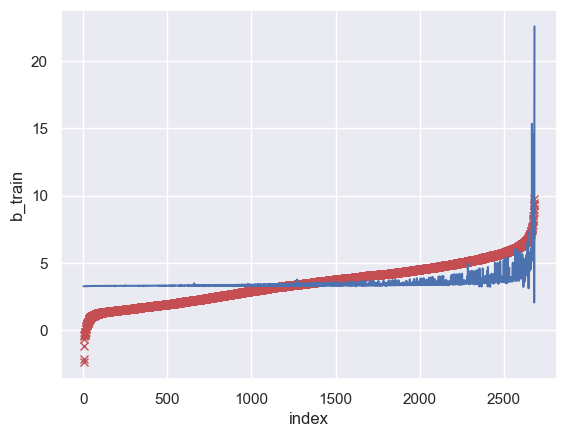

In [63]:

plt.plot(np.arange(1, n+1),btrain.iloc[train_sort_ind], 'x', color ='r')
plt.plot(np.arange(1, n+1), Atrain[train_sort_ind]@xtilde1)
plt.xlabel('index')
plt.ylabel('b_train')

#plt.xlim(2000, 2020)
plt.show()

#np.size(Atrain[train_sort_ind]@xtilde1)

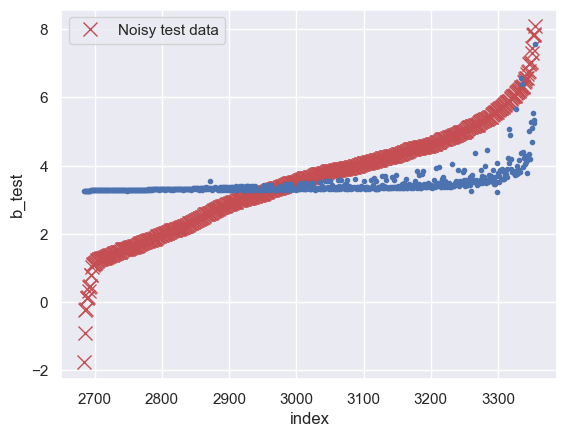

In [64]:
plt.plot(np.arange(n, n+len(btest)), btest.iloc[test_sort_ind], 'x', color ='r', markersize = 10, label ='Noisy test data' )
plt.plot(np.arange(n, n+len(btest)), Atest[test_sort_ind]@xtilde1, '.')
plt.xlabel('index')
plt.ylabel('b_test')
plt.legend()
plt.show()

In [ ]:
ax1 = fig.add_subplot(121)
#plt.plot(np.arange(1, n+1), btrain.iloc[train_sort_ind], 'x', color ='r', markersize = 10, label ='Noisy train data' )
#plt.plot(np.arange(1, n+1), Atrain[train_sort_ind]@xtilde1, '.', color = 'b', linewidth = 2 , label ='Regression line')
#plt.xlabel('index')
#plt.ylabel('b_train')
#plt.legend()
#plt.show()
# -----------------------------------------------------
# Test
#ax1 = fig.add_subplot(122)
#plt.plot(np.arange(n, n+len(btest)), btest.iloc[test_sort_ind], 'x', color ='r', markersize = 10, label ='Noisy test data' )
#plt.plot(np.arange(n, n+len(btest)), Atest[test_sort_ind]@xtilde1, '.', color = 'b', linewidth = 2 , label ='Regression line')
plt.plot(np.arange(n, n+len(btest)), btest.iloc[test_sort_ind], '.', color ='r', markersize = 10, label ='Noisy test data' )
plt.plot(np.arange(n, n+len(btest)), Atest[test_sort_ind]@xtilde1, 'x')
plt.xlabel('index')
plt.ylabel('b_test')
plt.legend()
#plt.xlim(2700,2750)
plt.show()

In [ ]:
xtilde1

### Error Analysis

#### Mean Average Error 

In [ ]:
MAE_test = sum(abs(btest.iloc[test_sort_ind]-Atest[test_sort_ind]@xtilde1)) / len(btest)
MAE_train = sum(abs(btrain.iloc[train_sort_ind]-Atrain[train_sort_ind]@xtilde1)) /  len(btrain)
print( 'Mean absolute error on the test set =', MAE_test,
     '\n', 'Mean absolute error on the train set =', MAE_train)
abs(MAE_test - MAE_train)
#print('Mean absolute error is :', MAE)
# do this for test and for train and compare!

We can see that permuting the dataset prior to constructing the model reduces the MAE difference between train and test set

#### Root mean-squared error

In [ ]:
RMSE_train = np.sqrt(sum(np.power(btrain.iloc[train_sort_ind]-Atrain[train_sort_ind]@xtilde1, 2))/len(btrain))
RMSE_train

In [ ]:
RMSE_test = np.sqrt(sum(np.power(btest.iloc[test_sort_ind]-Atest[test_sort_ind]@xtilde1, 2))/len(btest))
RMSE_test

In [ ]:
abs(RMSE_test - RMSE_train)

#### R2 error

In [ ]:
y = btrain
y_mean = btrain.mean()
N_samples = len(btrain)
var_mean = sum(np.power(y - y_mean, 2))/N_samples
var_line = np.power(RMSE_train,2)
R2 = (var_mean - var_line)/var_mean
## Dividing all by N: (exactly same computation)
var_mean_bis = y.var()

R2_bis = (var_mean_bis - var_line) / var_mean_bis
print(R2, '\n', R2_bis)

### Error distribution

In [ ]:
y_head = Atrain[train_sort_ind]@xtilde1
y = btrain.iloc[train_sort_ind]
residual_RMSE = np.power(y_head - y, 2 )
plt.scatter(np.arange(1, n+1),np.sqrt(residual_RMSE))
plt.xlim(0,200)
#plt.plot(np.arange(n, len(btest)+n), np.log(abs(Atest[test_sort_ind]@xtilde1-btest.iloc[test_sort_ind])), 'k--',
 #        linewidth =1, label = 'test set')
plt.legend(title='l1_error')
plt.xlabel('row rank')
plt.ylabel('Error_l1norm')
#plt.xlim([500, 900])
plt.show()

In [ ]:
# Checking outliers on error
dist_l1_error = df_nutriscore_components.groupby('nutriscore_classes')['additives_n'].median().index

plt.figure(figsize=(7,5))
sns.boxplot(x="additives_n", 
            y="nutriscore_classes", 
            showfliers=False,
            orient='h', 
            order = dist_additv_nutriscore,
            data=df_nutriscore_components);

In [ ]:
l1_error_train_df = (np.log(abs(Atrain[train_sort_ind]@xtilde1 - btrain.iloc[train_sort_ind])))
#l1_error_train_df.iloc[750:800]


In [ ]:
l1_error_train_df[:]

In [ ]:
# looking for elements located at indecies 750-800
#btrain.iloc[750:800] 
((np.log(abs(Atrain[train_sort_ind]@xtilde1-btrain.iloc[train_sort_ind]))).iloc[750:800])

In [ ]:
plt.plot(np.arange(1, len(btrain)+1), np.log(np.power(btrain-Atrain@xtilde1, 2)/2), 'g-',
         linewidth =1, label ='train set')
#plt.plot(np.arange(n, len(btest)+n), np.sqrt(np.power(btest.iloc[test_sort_ind]-Atest[test_sort_ind]@xtilde1, 2)), 'k-',
 #        linewidth =1, label = 'test set')
plt.legend(title='l2_error')
plt.xlabel('row rank')
plt.ylabel('l2_norm')
#plt.xlim([500, 900])
plt.show()

In [ ]:
# looking for elements located at indecies 750-800
#btrain.iloc[750:800] 
(np.power(btrain.iloc[train_sort_ind]-Atrain[train_sort_ind]@xtilde1, 2).iloc[0:10])

In [ ]:
np.exp(-9)

In [ ]:
np.log(0.5)

In [ ]:
fig = plt.figure(figsize=(12,15))
sm.graphics.plot_ccpr_grid(OLS_model)
#fig.tight_layout(pad=1.0)

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
## --------------------------------------------- ##
# Define the X (input) and y (target) features
X = boston.drop("MEDV", axis=1)
y = boston["MEDV"]
# Rescale the input features
scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(X)
# Split into train (2/3) and test (1/3) sets
test_size = 0.33
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
# Build some models (regression and k-neighbors) and check them against training data using MAE, RMSE and R2
models = [LinearRegression(), KNeighborsRegressor()]
for model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_train)
    print(type(model).__name__)
    print("    MAE", mean_absolute_error(y_train, predictions))
    print("    RMSE", sqrt(mean_squared_error(y_train, predictions)))
    print("    R2", r2_score(y_train, predictions))
    
# Evaluation the models against test data using MAE, RMSE and R2
for model in models:
    predictions = model.predict(X_test)
    print(type(model).__name__)
    print("    MAE", mean_absolute_error(y_test, predictions))
    print("    RMSE", sqrt(mean_squared_error(y_test, predictions)))
    print("    R2", r2_score(y_test, predictions))

In [ ]:
#Using scikit learn
# MAE
mean_absolute_error(actuals, predictions)

# RMSE
sqrt(mean_squared_error(actuals, predictions)

# R-Squared
r2_score(actuals, predictions)

## Error estimation 

### Mean Absolute Error (MAE)
The MAE has a big advantage in that the units of the MAE are the same as the units of y, tells us the average error in units of y, the predicted feature. A value of 0 indicates a perfect fit, i.e. all our predictions are spot on. 

In [ ]:
MAE_log_normal = sum(abs(y-^y))/len(samples)
Atest@xtilde1-btest
# do this for test and for train and compare!

R squared error

### Root mean-square error
Its calculation is very similar to MAE, but instead of taking the absolute value to get rid of the sign on the individual errors, we square the error, then we can compute its sum divided by the number of samples and take its square root to get back to the same unit than y

In [ ]:
RMSE = np.sqrt(sum(np.power(y-^y, 2))/len(samples))

Compared to MAE, RMSE gives a higher total error and the gap increases as the errors become larger. It penalizes a few large errors more than a lot of small errors. If you want your model to avoid large errors, use RMSE over MAE. You should also be aware that as the sample size increases, the accumulation of slightly higher RMSEs than MAEs means that the gap between these two measures also increases as the sample size increases

### R-squared 
R2 computes how much better the regression line fits the data than the mean line. An R-squared of 1 indicates a perfect fit. An R-squared of 0 indicates a model no better or worse than the mean. An R-squared of less than 0 indicates a model worse than just predicting the mean.

In [ ]:
var_mean = sum(np.power(y - y_mean, 2))
var_line = N_samples * RMSE
R2 = (var_mean−var_line)/var_mean
## Dividing all by N: (exactly same computation)
var_mean_bis = variance(y)
var_line_bis = RMSE
R2_bis = (var_mean_bis - var_line_bis) / var_mean_bis

## Residual plot analysis

Every regression model inherently has some degree of error since you can never predict something 100% accurately. Hence, a regression model can be explained as:
    Response = Deterministic +Stochastic
    
The deterministic part of the model is what we try to capture using the regression model. Ideally, our linear equation model should accurately capture the predictive information. Essentially, what this means is that if we capture all of the predictive information, all that is left behind (residuals) should be completely random & unpredictable i.e stochastic. Hence, we want our residuals to follow a normal distribution. And that is exactly what we look for in a residual plot.

###  Characteristics of Good Residual Plots

A few characteristics of a good residual plot are as follows:

    - It has a high density of points close to the origin and a low density of points away from the origin
    - It is symmetric about the origin
Finally, one other reason this is a good residual plot is that, independent of the value of an independent variable (x-axis), the residual errors are approximately distributed in the same manner. In other words, we do NOT see any patterns in the value of the residuals as we move along the x-axis. Hence, this satisfies our earlier assumption that regression model residuals are independent and normally distributed

A residual plot that has high density far away from the origin and low density close to the origin is a bad residual plot. Also, when we project the residuals on the y-axis, we can see the distribution curve is not normal. 
These plots signify that we have not completely captured the predictive information of the data in our model, which is why it is “seeping” into our residuals. A good model should always only have random error left after using the predictive information
____________________________________________________________________________

### Partial Regression Plots (Duncan)
We want to look at the relationship of the dependent variable and independent variables conditional on the other independent variables. We can do this through using partial regression plots, otherwise known as added variable plots. 
In a partial regression plot, to discern the relationship between the response variable and the k-th variable, we compute the residuals by regressing the response variable versus the independent variables excluding X_k. We can denote this by X~k. We then compute the residuals by X_k regressing on X~k. The partial regression plot is the plot of the former versus the latter residuals. The notable points of this plot are that the fitted line has slope b and intercept zero. The residuals of this plot are the same as those of the least squares fit of the original model with full . You can discern the effects of the individual data values on the estimation of a coefficient easily

### Component-Component plus Residual (CCPR) Plots¶
The CCPR plot provides a way to judge the effect of one regressor on the response variable by taking into account the effects of the other independent variables. The partial residuals plot is defined as versus . The component adds versus to show where the fitted line would lie. Care should be taken if is highly correlated with any of the other independent variables. If this is the case, the variance evident in the plot will be an underestimate of the true variance

In [ ]:

#nan_variables = ['LargestPropertyUseType', 'TotalGHGEmissions','GHGEmissionsIntensity'  ]
count_qualiVar = first_dataset['propertygfabuilding(s)'].value_counts()
ax = sns.barplot(x=count_qualiVar.index, y=count_qualiVar.values)
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
imported_data.duplicated().sum()
imported_data.nunique()

In [ ]:
first_dataset.nunique()